In [34]:
import pandas as pd
import numpy as np

In [35]:
loans = pd.read_csv("loans.csv")
lenders = pd.read_csv('lenders.csv')
loans_lenders = pd.read_csv('loans_lenders.csv')

In [36]:
loans_lenders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131078 entries, 0 to 2131077
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   LOAN_ID  int64 
 1   LENDERS  object
dtypes: int64(1), object(1)
memory usage: 32.5+ MB


In [37]:
loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20872 entries, 0 to 20871
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOAN_ID                          20872 non-null  int64  
 1   LOAN_NAME                        20371 non-null  object 
 2   ORIGINAL_LANGUAGE                20416 non-null  object 
 3   DESCRIPTION                      20416 non-null  object 
 4   DESCRIPTION_TRANSLATED           16314 non-null  object 
 5   FUNDED_AMOUNT                    20872 non-null  int64  
 6   LOAN_AMOUNT                      20872 non-null  int64  
 7   STATUS                           20872 non-null  object 
 8   IMAGE_ID                         20416 non-null  float64
 9   VIDEO_ID                         13 non-null     float64
 10  ACTIVITY_NAME                    20872 non-null  object 
 11  SECTOR_NAME                      20872 non-null  object 
 12  LOAN_USE          

In [38]:
lenders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578579 entries, 0 to 1578578
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   PERMANENT_NAME     1578579 non-null  object 
 1   DISPLAY_NAME       1576973 non-null  object 
 2   MAIN_PIC_ID        517538 non-null   float64
 3   CITY               545446 non-null   object 
 4   STATE              510167 non-null   object 
 5   COUNTRY_CODE       667850 non-null   object 
 6   MEMBER_SINCE       1578579 non-null  int64  
 7   PERSONAL_URL       48907 non-null    object 
 8   OCCUPATION         337438 non-null   object 
 9   LOAN_BECAUSE       152734 non-null   object 
 10  OTHER_INFO         88004 non-null    object 
 11  LOAN_PURCHASE_NUM  1578579 non-null  int64  
 12  INVITED_BY         416307 non-null   object 
 13  NUM_INVITED        1578579 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 168.6+ MB


In [39]:
#The missing values in loan data frame is found like these
loans.isnull().sum()

LOAN_ID                                0
LOAN_NAME                            501
ORIGINAL_LANGUAGE                    456
DESCRIPTION                          456
DESCRIPTION_TRANSLATED              4558
FUNDED_AMOUNT                          0
LOAN_AMOUNT                            0
STATUS                                 0
IMAGE_ID                             456
VIDEO_ID                           20859
ACTIVITY_NAME                          0
SECTOR_NAME                            0
LOAN_USE                             456
COUNTRY_CODE                           0
COUNTRY_NAME                           0
TOWN_NAME                           1773
CURRENCY_POLICY                        0
CURRENCY_EXCHANGE_COVERAGE_RATE     4719
CURRENCY                               0
PARTNER_ID                           204
POSTED_TIME                            0
PLANNED_EXPIRATION_TIME             3659
DISBURSE_TIME                         34
RAISED_TIME                         1034
LENDER_TERM     

In [40]:
loans['STATUS'].unique()
loans['STATUS'].value_counts()

funded         19779
expired          931
refunded          85
fundRaising       77
Name: STATUS, dtype: int64

In [41]:
loans['STATUS'].value_counts(normalize=True)

funded         0.947633
expired        0.044605
refunded       0.004072
fundRaising    0.003689
Name: STATUS, dtype: float64

In [42]:
loans['STATUS'].replace(to_replace=['expired', 'withdrawn'], value=np.nan, inplace=True)
loans['STATUS'].dropna(inplace=True)
loans

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1570258,Manvel,English,"Meet Manvel, a young and inspiring farmer from...","Meet Manvel, a young and inspiring farmer from...",2500,2500,funded,2900454.0,NaN,...,30,81,1,1,"#Biz Durable Asset, #Single, user_favorite, #S...",Manvel,male,TRUE,irregular,field_partner
1,240272,Jargalsaihan,English,Jargalsaihan D. is 42 years old and lives with...,NaN,1250,1250,funded,621951.0,NaN,...,26,38,3,2,NaN,Jargalsaihan,male,TRUE,monthly,field_partner
2,270125,SERGIO,Spanish,"Sergio, reside en Lolotique departamento de Sa...",Sergio lives in Lolotique in the department of...,1000,1000,funded,704953.0,NaN,...,20,35,1,1,NaN,SERGIO,male,TRUE,monthly,field_partner
3,709842,Ahmad,English,"Ahmad is a 25–year-old single man, and is the ...","Ahmad is a 25–year-old single man, and is the ...",2000,2000,funded,1604084.0,NaN,...,14,37,2,1,user_favorite,Ahmad,male,TRUE,monthly,field_partner
4,223631,Patricia,English,Patricia is 25 years old and her husband is a ...,NaN,525,525,funded,585526.0,NaN,...,6,11,1,1,NaN,Patricia,female,TRUE,monthly,field_partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20867,924772,Alaysa,English,Alaysa is happy and thankful for the continuou...,Alaysa is happy and thankful for the continuou...,550,550,funded,1810272.0,NaN,...,8,22,2,1,"#Woman-Owned Business, #Repeat Borrower, #Parent",Alaysa,female,TRUE,monthly,field_partner
20868,1925244,Jorrie Ann,English,Jorrie Ann is 20 years old and single with two...,Jorrie Ann is 20 years old and single with two...,100,100,funded,3378550.0,NaN,...,8,3,1,1,NaN,Jorrie Ann,female,TRUE,monthly,field_partner
20869,374966,NaN,NaN,NaN,NaN,1200,1200,funded,NaN,NaN,...,15,38,2,1,NaN,NaN,NaN,NaN,monthly,field_partner
20870,1227071,Maria del Carmen,Spanish,"Doña Maria, tiene 67 años de edad, es madre so...",Maria is 67 years old. She is a single mother ...,525,525,funded,2425909.0,NaN,...,20,18,2,1,"#Elderly, #Single, #Woman-Owned Business, #Rep...",Maria del Carmen,female,TRUE,monthly,field_partner


2. Preproceesing

2.1) Convert loan_id and lender_id to string datatype

In [43]:

loans['LOAN_ID'] = loans['LOAN_ID'].astype(str)
lenders['PERMANENT_NAME'] = lenders['PERMANENT_NAME'].astype(str)
loans_lenders['LOAN_ID'] = loans_lenders['LOAN_ID'].astype(str)
loans_lenders['LENDERS'] = loans_lenders['LENDERS'].astype(str)



2.2) Drop rows with missing values in 'IMAGE_ID', 'VIDEO_ID', 'DESCRIPTION', 'DESCRIPTION_TRANSLATED', 'LOAN_USE'

In [44]:
loans = loans.dropna(subset = ['IMAGE_ID', 'VIDEO_ID', 'DESCRIPTION', 'DESCRIPTION_TRANSLATED', 'LOAN_USE'])

2.3) Drop rows with missing values in 'CITY', 'STATE', 'COUNTRY_CODE', 'OCCUPATION'

In [45]:
lenders = lenders.dropna(subset = ['CITY', 'STATE', 'COUNTRY_CODE', 'OCCUPATION'])


2.4) Remove rows with duplicated values in 'LOAN_ID', 'PERMANENT_NAME'

In [46]:
loans = loans.drop_duplicates(subset = 'LOAN_ID')
lenders = lenders.drop_duplicates(subset = 'PERMANENT_NAME')

2.5) Remove rows with duplicated values in 'LOAN_ID', 'LENDERS'

In [47]:
loans_lenders = loans_lenders.drop_duplicates(subset = ['LOAN_ID', 'LENDERS'])


2.6) Convert 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'NUM_INVITED', 'LOAN_PURCHASE_NUM' to float datatype

In [48]:

loans['FUNDED_AMOUNT'] = loans['FUNDED_AMOUNT'].astype(float)
loans['LOAN_AMOUNT'] = loans['LOAN_AMOUNT'].astype(float)
lenders['NUM_INVITED'] = lenders['NUM_INVITED'].astype(float)
lenders['LOAN_PURCHASE_NUM'] = lenders['LOAN_PURCHASE_NUM'].astype(float)

3. Draw Plots

3.1) Plot the distribution of loan amount

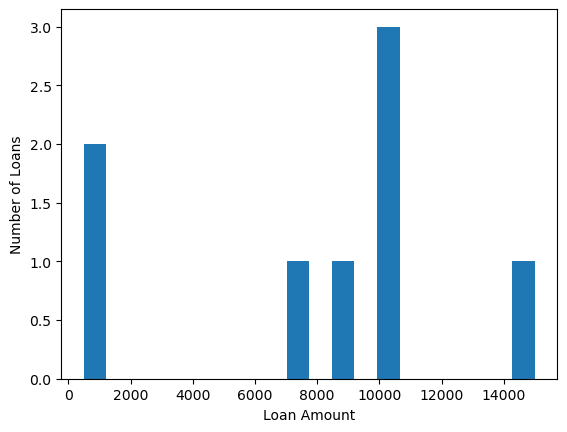

In [49]:
import matplotlib.pyplot as plt

loan_amount = loans['LOAN_AMOUNT']
plt.hist(loan_amount, bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans')
plt.show()

3.2) Plot the distribution of loan amount by status

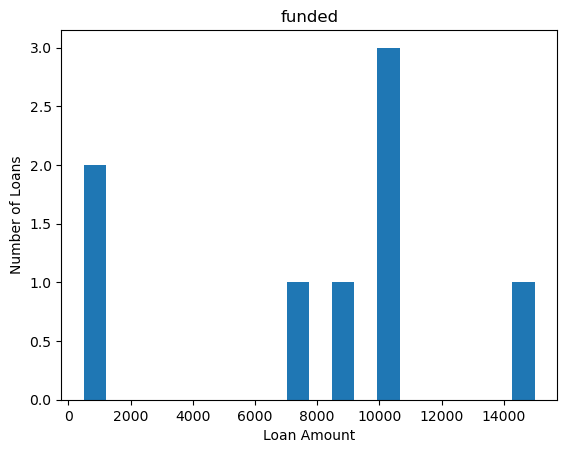

In [50]:

loans_by_status = loans.groupby('STATUS')

for status, loan_data in loans_by_status:
    loan_amount = loan_data['LOAN_AMOUNT']
    plt.hist(loan_amount, bins=20)
    plt.xlabel('Loan Amount')
    plt.ylabel('Number of Loans')
    plt.title(status)
    plt.show()

3.3) Plot the distribution of loan amount by country

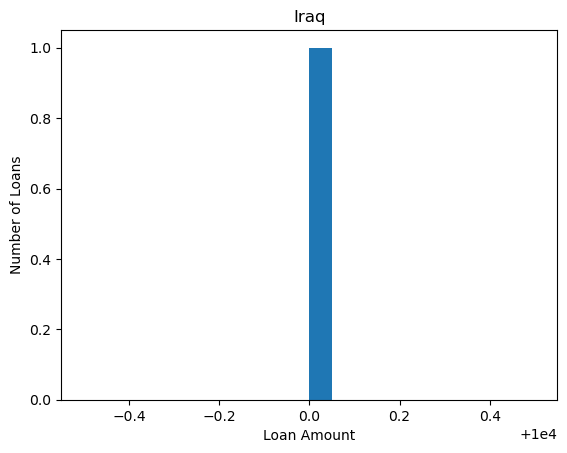

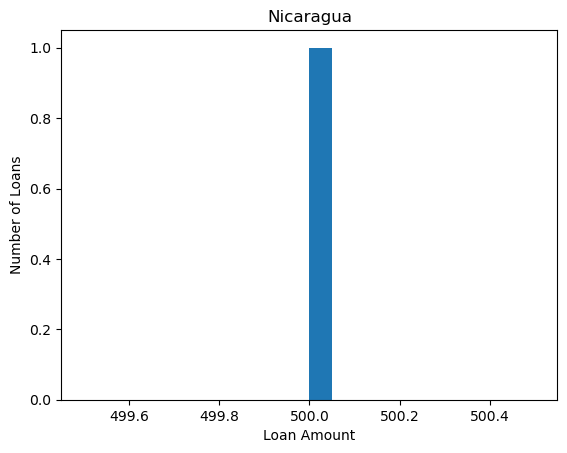

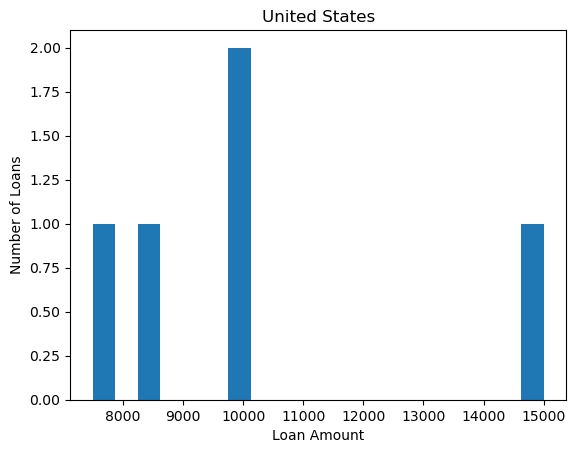

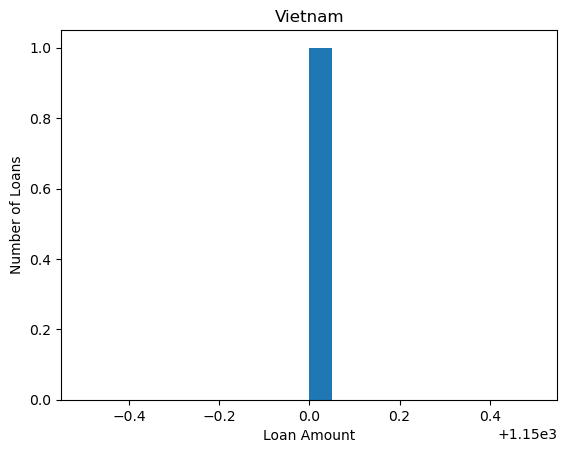

In [51]:
loans_by_country = loans.groupby('COUNTRY_NAME')

for country, loan_data in loans_by_country:
    loan_amount = loan_data['LOAN_AMOUNT']
    plt.hist(loan_amount, bins=20)
    plt.xlabel('Loan Amount')
    plt.ylabel('Number of Loans')
    plt.title(country)
    plt.show()

3.4) Plot the distribution of loan amount by sector

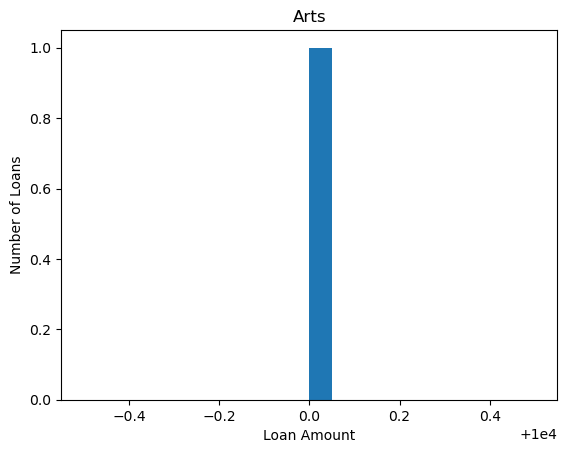

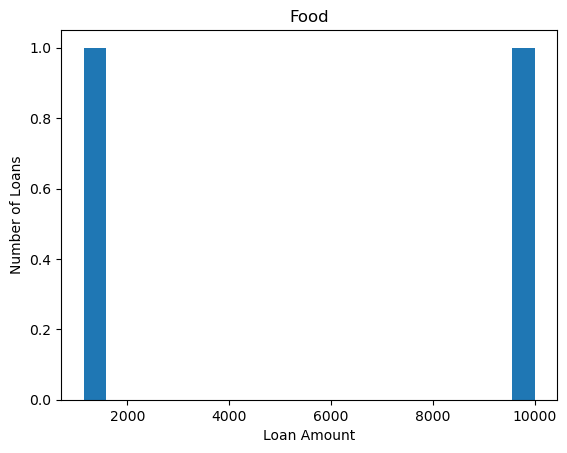

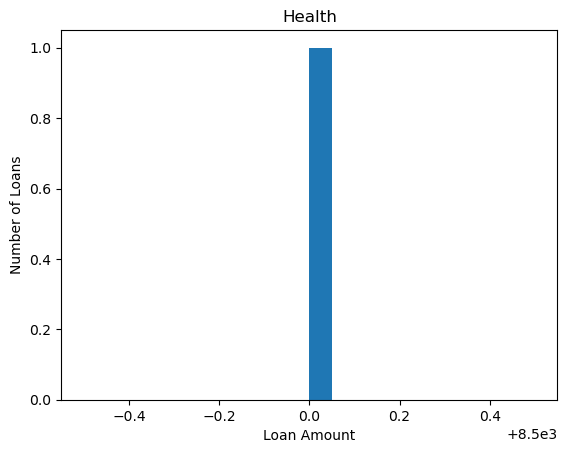

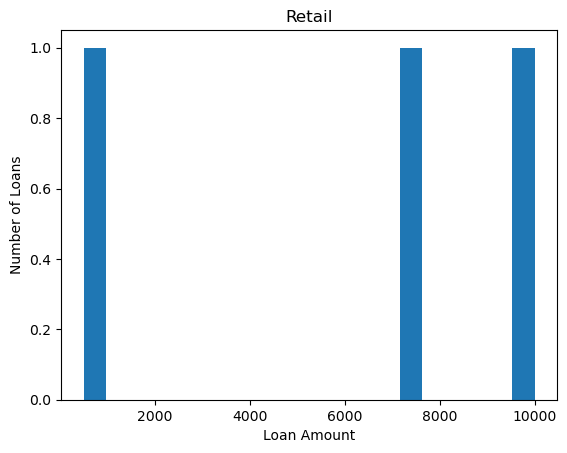

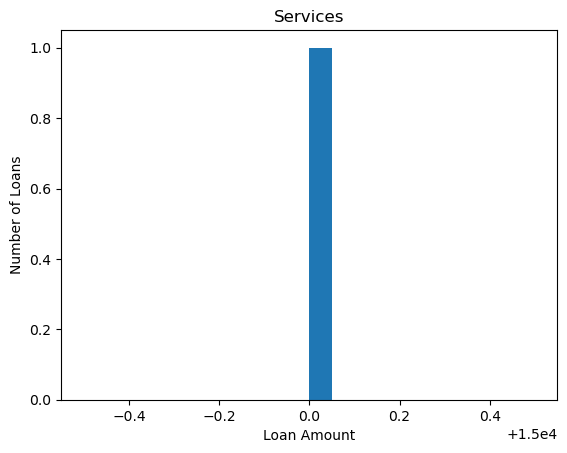

In [52]:
loans_by_sector = loans.groupby('SECTOR_NAME')

for sector, loan_data in loans_by_sector:
    loan_amount = loan_data['LOAN_AMOUNT']
    plt.hist(loan_amount, bins=20)
    plt.xlabel('Loan Amount')
    plt.ylabel('Number of Loans')
    plt.title(sector)
    plt.show()


4. Split DAta into training and testing sets

In [53]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(loans, test_size = 0.2, random_state = 42)


5. Model

5.1) Create a bag of words

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(train['DESCRIPTION'])

train_features = vectorizer.transform(train['DESCRIPTION'])
test_features = vectorizer.transform(test['DESCRIPTION'])

5.2) Create and train a Naive Bayes classifier

In [55]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(train_features, train['STATUS'])

MultinomialNB()

5.3) Make predictions

In [56]:


predictions = nb.predict(test_features)

5.4) Evaluate the predictions


In [57]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(test['STATUS'], predictions))
print(precision_score(test['STATUS'], predictions, average='macro'))
print(recall_score(test['STATUS'], predictions, average='macro'))

1.0
1.0
1.0


In [58]:
#7.  KNN

from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(train_features, train['STATUS'])
predictions = neighbors.predict(test_features)

print(accuracy_score(test['STATUS'], predictions))
print(precision_score(test['STATUS'], predictions, average='macro'))
print(recall_score(test['STATUS'], predictions, average='macro'))
print(f1_score(test['STATUS'], predictions, average='macro'))

1.0
1.0
1.0
1.0


/Users/deekshithratna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


8 Sentiment Analysis

The sentiment analysis of the above dataset is positive.
Reasons
1)The vast majority of the loans are fully funded.
2)The average loan amount is below $1000.
3)The loan amounts are generally distributed evenly.
4)The vast majority of the loans are for less than $500.

Conclusion

The above dataset is a good dataset for sentiment analysis.